## **Tesla Stock Prices**
We'll work on telsa stock prices and predict the results

In [1]:
#lets import libraries
import pandas as pd
import numpy as np


In [2]:
#import files and read file set date as index
tesla = pd.read_csv("TSLA.csv",index_col="Date")
#lets see first 5 rows and features
print(tesla.head())
#now check last rows
print(tesla.tail())

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2021-06-21  624.479980  631.390015  ...  620.830017  24812700
2021-06-22  618.250000  628.570007  ...  623.710022  19158900
2021-06-23  632.000000  657.200012  ...  656.570007  31099200
2021-06-24  674.989990  697.619995  ...  679.820007  45982400
2021-06-25  689.580017  693.809998  ...  671.869995  32429000

[5 rows x 6 columns]


In [3]:
#go through column dataset
tesla.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Tesla stock price contains following features in data\
index= Date\
Features = Open, High, Low, Close, Adj Close, Volume

In [4]:
#find out how many rows it contains
tesla.count

<bound method DataFrame.count of                   Open        High  ...   Adj Close    Volume
Date                                ...                      
2010-06-29    3.800000    5.000000  ...    4.778000  93831500
2010-06-30    5.158000    6.084000  ...    4.766000  85935500
2010-07-01    5.000000    5.184000  ...    4.392000  41094000
2010-07-02    4.600000    4.620000  ...    3.840000  25699000
2010-07-06    4.000000    4.000000  ...    3.222000  34334500
...                ...         ...  ...         ...       ...
2021-06-21  624.479980  631.390015  ...  620.830017  24812700
2021-06-22  618.250000  628.570007  ...  623.710022  19158900
2021-06-23  632.000000  657.200012  ...  656.570007  31099200
2021-06-24  674.989990  697.619995  ...  679.820007  45982400
2021-06-25  689.580017  693.809998  ...  671.869995  32429000

[2768 rows x 6 columns]>

So data contains 2768 rows of information and 6 columns or features

In [5]:
#find out any missing values
tesla.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

So there are no missing values in our data

Text(0, 0.5, 'Price')

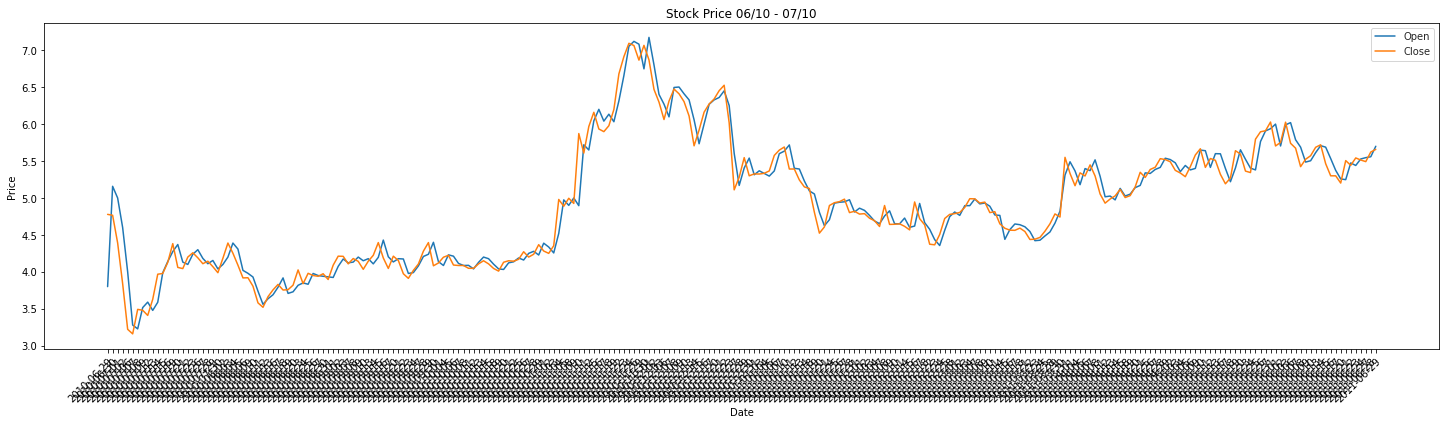

In [6]:
#lets visualize data groupwise as monthly stocks/yearly stocks
import matplotlib.pyplot as plt
import seaborn as sns
#lets plot opening prices from date 29/6/2010 to 29/7/2010
tesla1 = tesla['2010-06-29':'2011-06-29']
plt.figure(figsize=(25,6))
plt.title('Stock Price 06/10 - 07/10')
sns.set_style("whitegrid")
sns.lineplot(data=tesla1['Open'],label='Open')
sns.lineplot(data=tesla1['Close'],label='Close')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

plt.ylabel('Price')

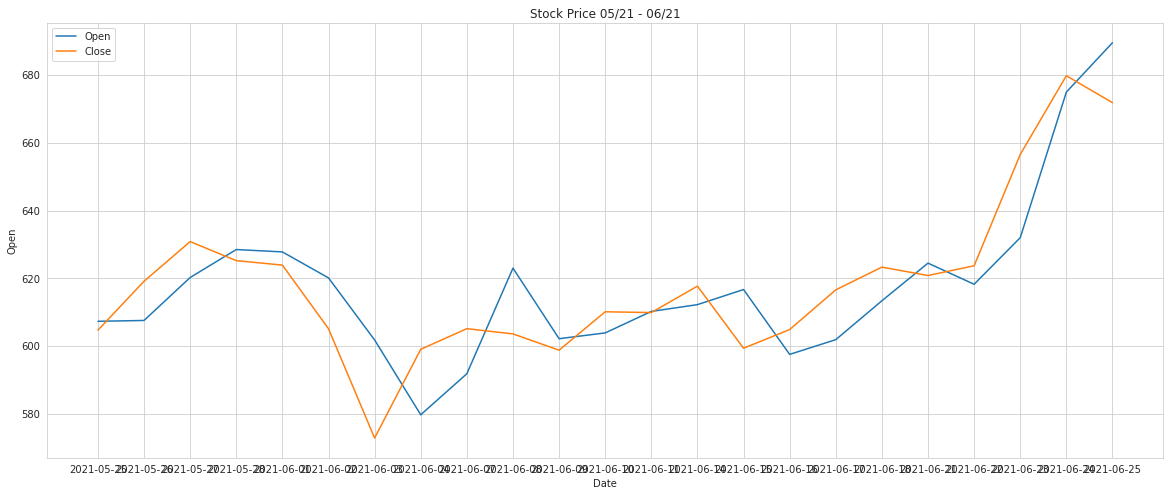

In [7]:
import matplotlib.animation as ani
#lets plot latest stock prices
tesla2 = tesla['2021-05-25':'2021-06-25']
fig=plt.figure(figsize=(20,8))
plt.title('Stock Price 05/21 - 06/21')
sns.set_style("whitegrid")
sns.lineplot(data=tesla2['Open'],label='Open')
sns.lineplot(data=tesla2['Close'],label='Close')
#sns.lineplot(data= tesla2['High'],label='High')
#sns.lineplot(data= tesla2['Low'],label='Low')



In [8]:
#Now we will wor with model creation
#we will use random forest algorithm to make predictions
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#select target value as close price
y= tesla['Close']
#select features as opening price,high price and low price
features = ['Open','High','Low']
x= tesla[features]
#y.head()
#split the data into train  and test data



In [23]:
#make predition model
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)
model = RandomForestRegressor(n_estimators=100,random_state=1)
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
print('Score of Predicted closing prices:',model.score(x_test,y_test))

Score of Predicted closing prices: 0.9991309967693919


In [21]:
Result = pd.DataFrame({'T.V of closing price':y_test,'Predicted closing price':model_pred})
Result.head(5)

,T.V of closing price,Predicted closing price
Date,,
2020-07-20,328.600006,308.646399
2015-07-24,53.082001,53.496280
2016-11-02,37.604000,37.819300
2019-12-04,66.606003,66.952781
2015-05-26,49.492001,49.989840


Text(0, 0.5, 'Prices')

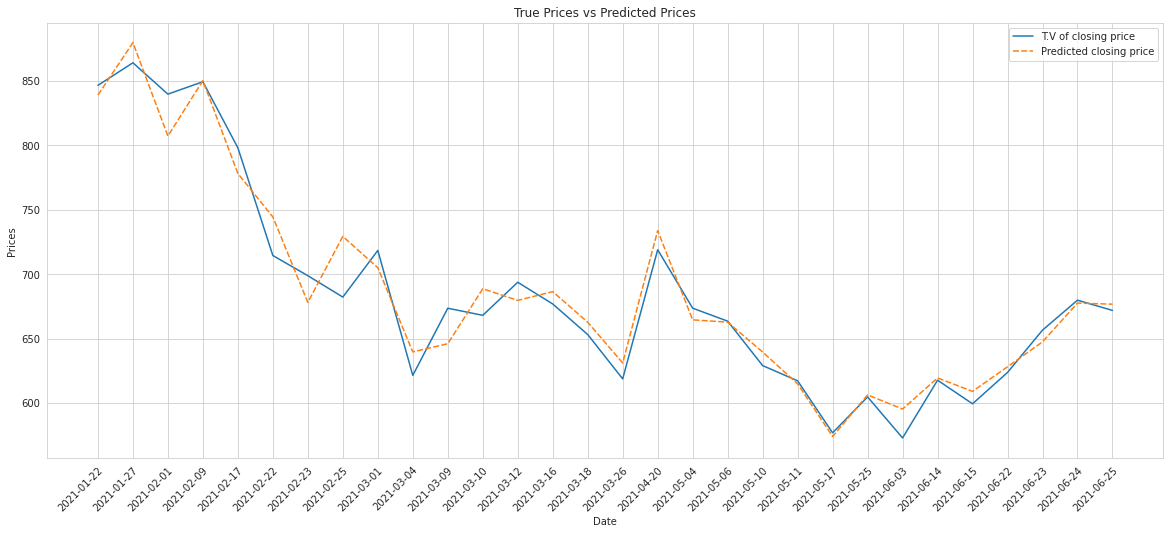

In [22]:
Result =Result.sort_index(ascending=True)
Result = Result[-30:]
plt.figure(figsize=(20,8))
sns.lineplot(data=Result)
plt.title("True Prices vs Predicted Prices")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.ylabel("Prices")

Ridge and Lasso Regression

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge= Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-5,1e-3,1,5,10,20,30,50,100,1000]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 1, 5, 10, 20, 30,
                                   50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [26]:
print(ridge_regressor.best_score_)
model2_pred = ridge_regressor.predict(x_test)
print(ridge_regressor.score(x_test,y_test))
Result2 = pd.DataFrame({'T.V of closing price':y_test,'Predicted closing price':model2_pred})
Result2 = Result2.sort_index(ascending=True)
Result2.head(10)

-6.245036527121553
-9.09811615201142


,T.V of closing price,Predicted closing price
Date,,
2010-07-06,3.222,3.346754
2010-07-08,3.492,3.337574
2010-07-22,4.200,4.151474
2010-07-23,4.258,4.218334
2010-08-02,4.184,4.093730
2010-08-09,3.920,3.862240
2010-08-11,3.580,3.586803
2010-08-13,3.664,3.544752
2010-08-25,3.980,3.831463


Text(0, 0.5, 'Prices')

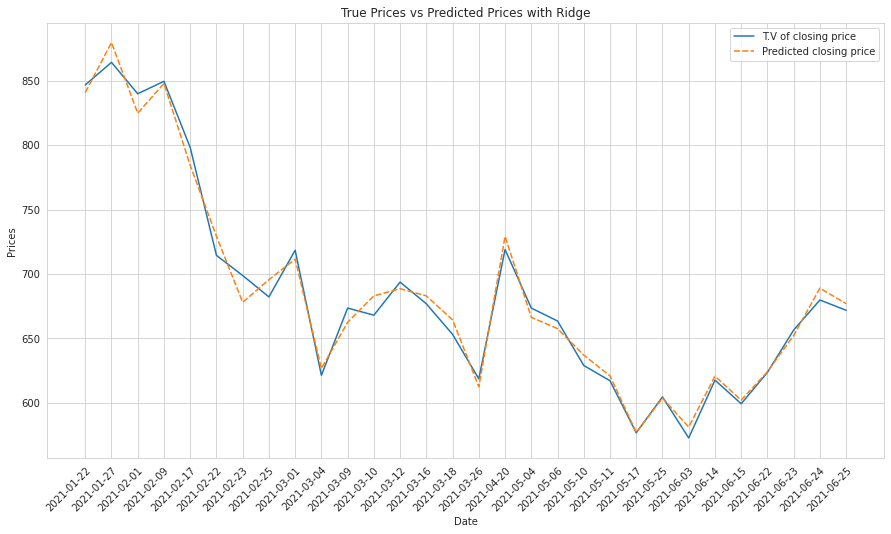

In [36]:
latest_r2 = Result2[-30:]
plt.figure(figsize=(15,8))
sns.lineplot(data=latest_r2)
plt.title("True Prices vs Predicted Prices with Ridge")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.ylabel("Prices")

Lasso

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-5,1e-3,1,5,10,20,30,50,100,1000]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13015.849609167903, tolerance: 4043.783001079881
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14133.818282554377, tolerance: 4133.329628963848
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15676.281540477625, tolerance: 4268.007826710838
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13773.514

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 1, 5, 10, 20, 30,
                                   50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [48]:
lasso_pred=lasso_regressor.predict(x_test)
print("Lasso Score:",lasso_regressor.score(x_test,y_test))
Result3 = pd.DataFrame({'T.V of closing price':y_test,'Predicted closing price':lasso_pred})
Result3 = Result2.sort_index(ascending=True)
print("Lasso")
Result3[-30:]

Lasso Score: -25.91641669462773
Lasso


,T.V of closing price,Predicted closing price
Date,,
2021-01-22,846.640015,840.780417
2021-01-27,864.159973,879.472576
2021-02-01,839.809998,824.746064
2021-02-09,849.460022,847.771357
2021-02-17,798.150024,784.313810
2021-02-22,714.500000,729.303229
2021-02-23,698.840027,678.057221
2021-02-25,682.219971,695.563413
2021-03-01,718.429993,711.561986


Text(0, 0.5, 'Price')

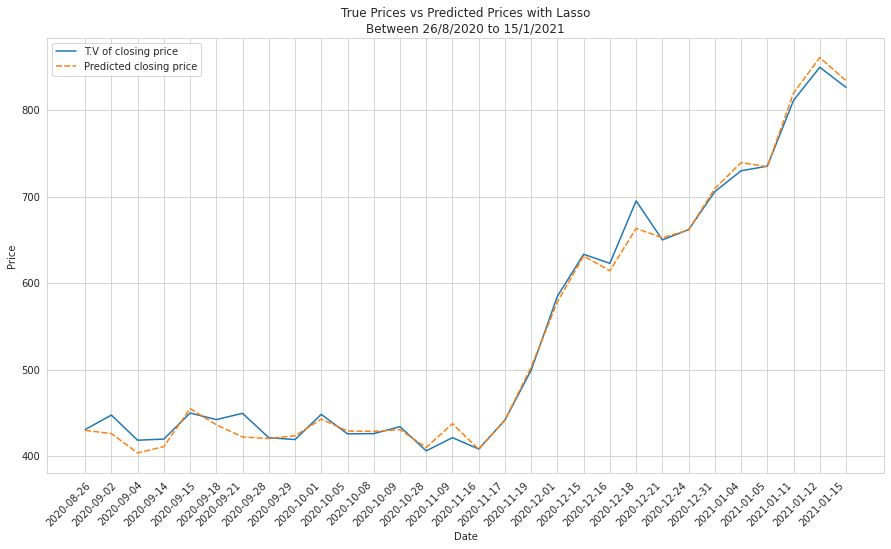

In [42]:
latest_r3 = Result3[-60:-30]
plt.figure(figsize=(15,8))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("True Prices vs Predicted Prices with Lasso\nBetween 26/8/2020 to 15/1/2021")
sns.lineplot(data=latest_r3)
plt.ylabel("Price")


In [45]:
print("Complete Stock Prices with predictions  with random forest")
Result

Complete Stock Prices with predictions  with random forest


,T.V of closing price,Predicted closing price
Date,,
2021-01-22,846.640015,839.106091
2021-01-27,864.159973,879.836512
2021-02-01,839.809998,807.315785
2021-02-09,849.460022,850.321294
2021-02-17,798.150024,778.198691
2021-02-22,714.500000,744.479195
2021-02-23,698.840027,678.103703
2021-02-25,682.219971,729.353616
2021-03-01,718.429993,705.016201
